# Introduction - the CRISP-DM Model

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1280px-CRISP-DM_Process_Diagram.png" width="600"/>
</div>

CRISP-DM, or Cross Industry Standard Process for Data Mining, is a widely used model for managing data mining and machine learning projects. It consists of six phases that guide the project from start to finish. In this explanation, we will explore each phase in detail.

## 1. Business Understanding

The first phase involves understanding the project's objectives, requirements, and resources. This step is crucial as it helps define the scope of the project, determine the feasibility of the project, and identify the stakeholders involved. The goal is to create a clear understanding of the business problem that needs to be solved and define the key performance indicators (KPIs) that will be used to measure the success of the project.

## 2. Data Understanding

The second phase involves gathering and exploring the data required to solve the business problem. This step aims to understand the quality and characteristics of the data and identify any potential issues that could affect the analysis. The data must be collected, cleaned, and prepared for modeling in this phase.

## 3. Data Preparation

The third phase involves preparing the data for analysis. This step involves data cleaning, data transformation, and feature engineering. The goal is to create a clean and structured dataset that can be used for modeling.

## 4. Modeling

The fourth phase involves building the model. This step involves selecting the appropriate algorithm, training the model, and validating the results. The goal is to create a predictive model that can solve the business problem.

## 5. Evaluation

The fifth phase involves evaluating the model's performance. This step involves measuring the model's accuracy, precision, recall, and other metrics. The goal is to determine whether the model is suitable for the business problem and whether it meets the KPIs defined in the first phase.

## 6. Deployment

The sixth and final phase involves deploying the model into the business environment. This step involves integrating the model into the existing systems, testing it, and monitoring its performance. The goal is to ensure that the model is working as expected and delivering the desired results.

In conclusion, the CRISP-DM model is a structured approach to managing data mining and machine learning projects. It provides a clear roadmap for project managers, data scientists, and other stakeholders to follow, ensuring that the project is delivered on time and within budget while meeting the business requirements.

# Setup

###How does the setup work?

!pip: command to invoke the package management tool called "pip," which is used in Python to install packages

install": argument for the "pip" command

numpy: Python library for numerical computations and arrays

pandas: a Python library for data analysis and manipulation

scikit-learn: a Python library for machine learning and data analysis

seaborn: a Python library for creating charts and visualizations

matplotlib: another Python library for creating charts and visualizations

geopandas: a Python library for geospatial data processing and visualization

kaggle: source for many datasets you can use for your experiments: https://www.kaggle.com/datasets

In [1]:
!pip install numpy pandas scikit-learn seaborn matplotlib geopandas
!pip install kaggle
!git clone https://github.com/joncutrer/geopandas-tutorial.git

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import sklearn

fatal: destination path 'geopandas-tutorial' already exists and is not an empty directory.


# 1. Business Understanding - The Use Case

In the real estate industry, it is crucial to accurately predict the value of a house based on its properties to make informed decisions when buying or selling properties. To achieve this, we will be using the California housing dataset to build a predictive model that can accurately estimate the value of a house based on its characteristics.

# 2. Data Understanding - The Data Set

To develop our predictive model, we have access to data from our customer in the form of a CSV file. This data will provide us with valuable insights into the characteristics and values of their properties, allowing us to build a  model for predicting house prices.

Example of the dataset from the platform kaggle about california house prices with further informations: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

### The Basics



#### Pandas Dataframes
In this notebook, we utilize a number of functions and data types from the Pandas library, including DataFrames, the round() function, the describe() function, and the read_csv() function. These tools allow us to efficiently manage and manipulate our data, performing important tasks such as rounding numerical values, providing summary statistics, and reading CSV files into our notebook.

- Offical api documentation --> https://pandas.pydata.org/docs/reference/  
- For more pandas information or functions see -> https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

We start with crating an example of a Dataframe:

In [2]:
df_example = pd.DataFrame([[4.234, 7.2345, 10.12], [5.45653, 8.123, 11.22], [6.1, 9.3453, 12.1234]], index=[1, 2, 3], columns=['a', 'b', 'c'])

print("Standard Dataframe:")
df_example

Standard Dataframe:


,a,b,c
1,4.23400,7.2345,10.1200
2,5.45653,8.1230,11.2200
3,6.10000,9.3453,12.1234


The function .info() shows information about all columns of the dataframe:

In [3]:
print("Dataframe used with .info() Function:")
df_example.info()

Dataframe used with .info() Function:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      float64
 1   b       3 non-null      float64
 2   c       3 non-null      float64
dtypes: float64(3)
memory usage: 96.0 bytes


The function .describe() shows for numeric data frames the number, the mean, the standard deviation, the minimum, the maximum as well as the lower, 50th and upper percentile:


In [4]:
print("Dataframe used with .describe() Function:")
df_example.describe()

Dataframe used with .describe() Function:


,a,b,c
count,3.000000,3.000000,3.000000
mean,5.263510,8.234267,11.154467
std,0.947856,1.059790,1.003306
min,4.234000,7.234500,10.120000
25%,4.845265,7.678750,10.670000
50%,5.456530,8.123000,11.220000
75%,5.778265,8.734150,11.671700
max,6.100000,9.345300,12.123400


The .round() function rounds the values of a data frame to a specific decimal digit, which can be passed as a parameter:


In [5]:
print("Dataframe rounded to 2 decimals with the .round() Function:")
df_example.round(2)

Dataframe rounded to 2 decimals with the .round() Function:


,a,b,c
1,4.23,7.23,10.12
2,5.46,8.12,11.22
3,6.10,9.35,12.12


The .copy() function copies the data and indicies of an existing dataframe and creates a copy of it as a new dataframe:


In [6]:
df_copy = df_example.copy(deep=False)

print("Are both data frames equal? " + "\n" + str(df_copy == df_example))

# "==" and "is" | df_reference = df_example

Are both data frames equal? 
      a     b     c
1  True  True  True
2  True  True  True
3  True  True  True


The .apply() function applies a specific operation on either a specific index or column:


In [7]:
print("The example data frame, summed in each index:")
df_example.apply(np.sum, axis=0) #axis = 0 --> index | axis = 1 --> column

The example data frame, summed in each index:


a    15.79053
b    24.70280
c    33.46340
dtype: float64

#### Seaborn
Seaborn is a Python data visualization library that builds upon Matplotlib to provide a high-level interface for creating visually appealing and informative statistical graphics to better understand our data. For example, we can use Seaborn to generate a scatter plot of the relationship between two variables.

In the following there are different visualisations in seaborn like scratter plot, histplot, lineplot

For more informations see: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

For example we can use Seaborn to create a scatter plot or a line plot:


<Axes: xlabel='a', ylabel='b'>

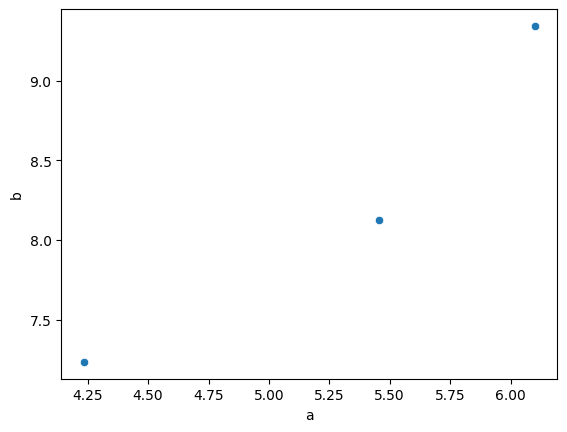

In [8]:
sns.scatterplot(x='a', y='b', data=df_example)

<Axes: xlabel='a', ylabel='b'>

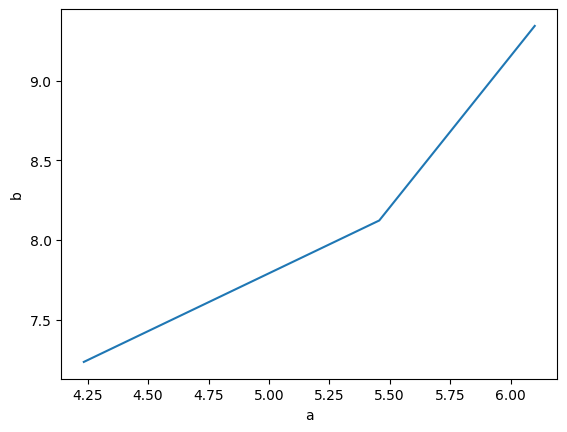

In [9]:
# Use seaborn to create a lineplot
sns.lineplot(x='a', y='b', data=df_example)

### The Use Case

#### Loading the data

The CSV-File is read and loaded via the Pandas Function ".read.csv()" and converted into the data type "DataFrame" offered by Pandas:<br> Data Frames are multi-dimensional tables on which you can perform functions and queries via indexes.

In [10]:
#TODO Datei von Github laden
#!wget https://github.com/Seb1703/AI-Dojo/blob/main/Basics/sample_data/housing_new.csv
#!mv housing_new.csv /content/sample_data/
df = pd.read_csv("./sample_data/housing_new.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,-352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### A first look at the data

We start with using the .describe() and the .into() function for more details.

In [11]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206795.17
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115504.27
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,-352100.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264700.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


For example we can see, that there are some negative house prices in the data set. We have to deal with this laster. But as we see not all colums of the
.describe() function are useful. For instance the mean of the longitude.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that there are missing values in the column total_bedrooms. We have to deal with this issue later.

We continue with visualizing our data with graphs from the seaborn library
- For more information on seaborn at its functions see --> http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247 (does not working at the moment)

- For further information on seaborn see --> https://seaborn.pydata.org/tutorial/function_overview.html


We start with scatterplots of diferent parameters:

<Axes: xlabel='households', ylabel='total_bedrooms'>

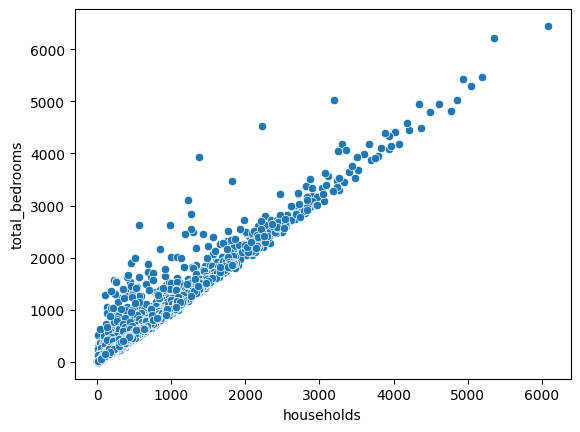

In [13]:
sns.scatterplot(data=df, x="households", y="total_bedrooms")

<Axes: xlabel='population', ylabel='median_house_value'>

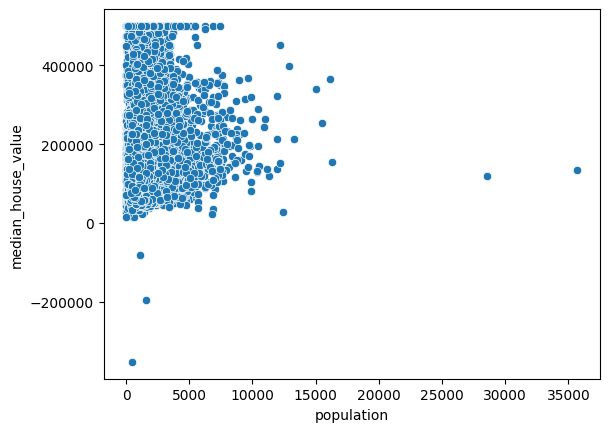

In [14]:
sns.scatterplot(data=df, x="population", y="median_house_value")

<Axes: xlabel='longitude', ylabel='housing_median_age'>

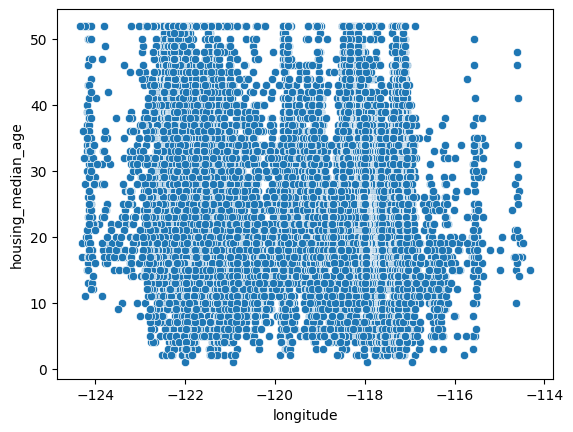

In [15]:
sns.scatterplot(data=df, x="longitude", y="housing_median_age")

<Axes: xlabel='latitude', ylabel='housing_median_age'>

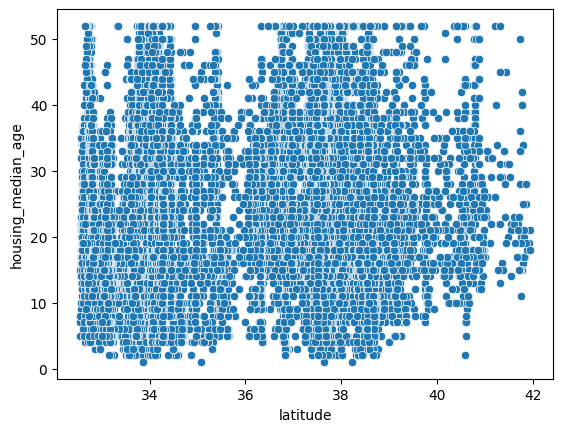

In [16]:
sns.scatterplot(data=df, x="latitude", y="housing_median_age")

These graphs can only show a correlation between the number of households and the number of bedrooms (Graph1). However, we have to evaluate if this correlation helps us in the context of predicting houseprices.

In order to find more useful correlations we continue with a correlation matrix and plotting a heatmap of these correlations:

<Axes: >

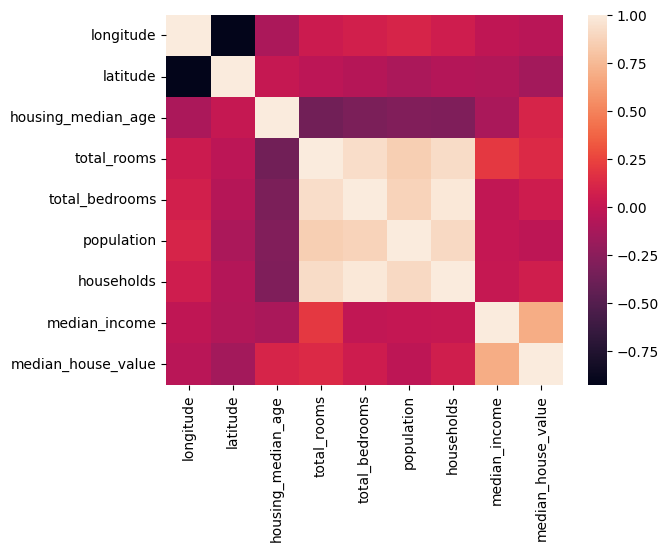

In [17]:
sns.heatmap(df.corr())

In [18]:
df.corr()["median_house_value"]

longitude            -0.045715
latitude             -0.144132
housing_median_age    0.105020
total_rooms           0.134260
total_bedrooms        0.049847
population           -0.024393
households            0.065978
median_income         0.687177
median_house_value    1.000000
Name: median_house_value, dtype: float64

As we can see, only the average income and the geographical position are relevant for predicting the house value. In the following we want to focus on the geographical position. Therefore we plot a map of california with geopandas as the background of a scatterplot of longitude and latitude:

<Axes: >

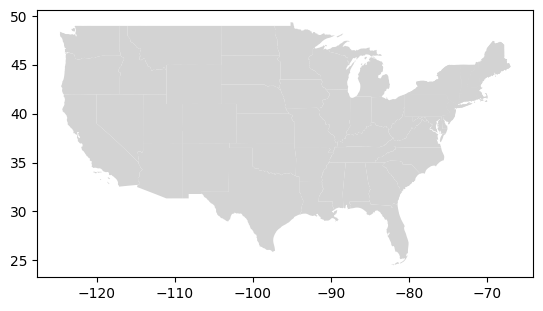

In [19]:
states = gpd.read_file('./geopandas-tutorial/data/usa-states-census-2014.shp')
states.plot(color="lightgrey")

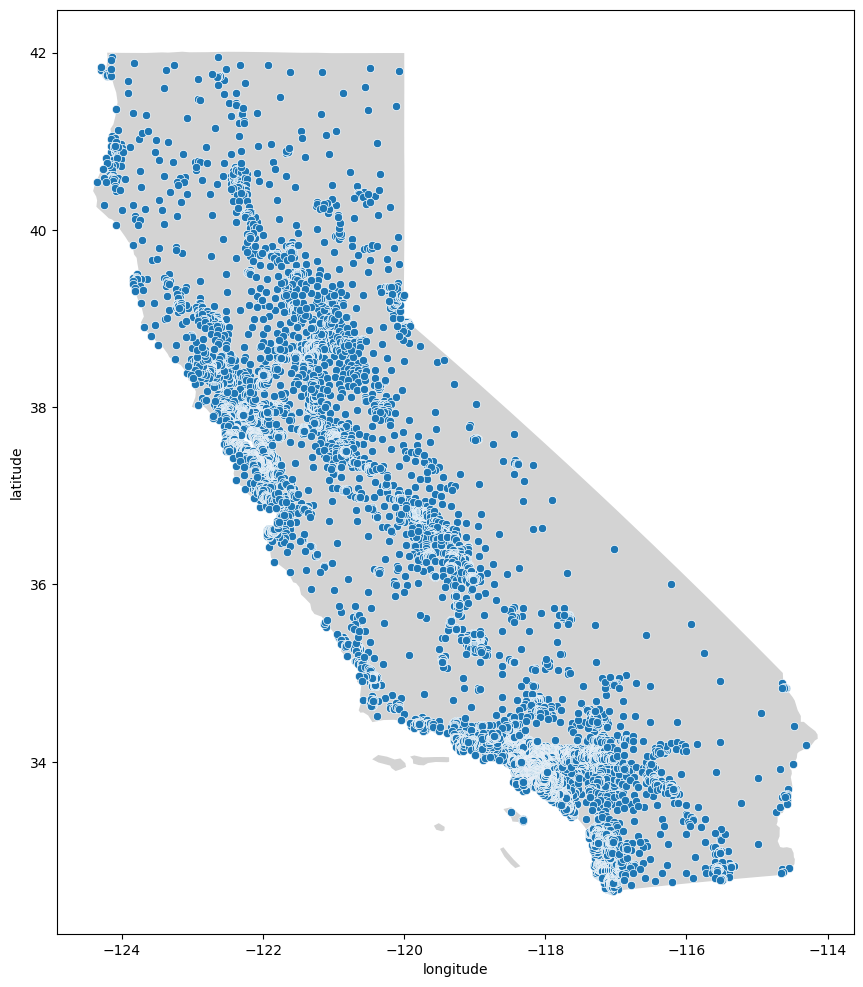

In [20]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

# plot points
sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax)

plt.show()

# 3. Data Preperation



### The Basics

After taking a first look on our data, we have to prepare our data for the training of a model. Important steps usually are:

1) **Dealing with missing data:**
You can eather delete ore impute the data. For more information on when to use which method follow the link: https://www.shiksha.com/online-courses/articles/handling-missing-values-beginners-tutorial/

2) **Removing outliers:** If you have datapoints that deviate strongly from the rest of the dataset you have to decide whether those are genuine extreme values or if they are errors. For more information on when to use which method follow the link: https://thedocs.worldbank.org/en/doc/20f02031de132cc3d76b91b5ed8737d0-0050012017/related/lecture-12-1.pdf

### The Use Case

#### Cleaning the data

We start with dealing with missing data. As we found out earlier there are missing values in the column "total_bedrooms". Since we do not want to loose these datasets completely, we decide to use imputation.

We use a mathematical approach:

total_bedrooms = total_rooms * (⌀total_rooms / ⌀total_bedrooms)



In [21]:
x = df["total_rooms"].mean()/df["total_bedrooms"].mean()
df["total_bedrooms"].fillna(df["total_rooms"]*x, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We continue with dealing with outliers. As we have already seen above with the .describe function there are negative house values in the dataset. Scince the house value is our target variable, we will delete these values:

In [22]:
df.drop(df[df['median_house_value'] < 0].index, inplace = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### Preparing a classifier

We start with classifying our data into low, medium and high price. Therefore we devide the dataset into 3 quantiles.
This way, we can add a new column with the appriopriate classification in a copy of our dataset. In the following map you can see the classified datapionts:

In [23]:
bord1 = df.quantile(q=0.33333)["median_house_value"]
bord2 = df.quantile(q=0.66666)["median_house_value"]
def get_value(x):
  if x < 141400.00:
    return "low"
  if x > 230319.57:
    return "high"
  return "medium"

df_class = df.copy()

df_class["house_value"] = df_class.median_house_value.apply(get_value)
df_class

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,high
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,high
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,low


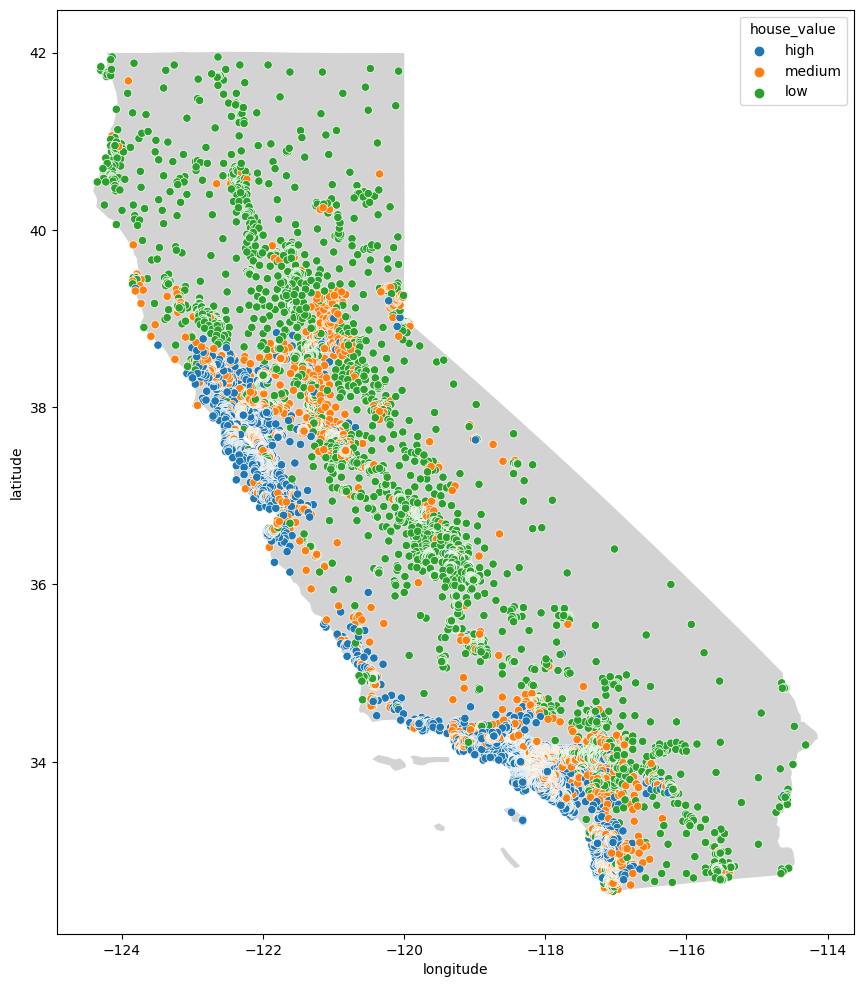

In [24]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

# plot points
sns.scatterplot(data=df_class, x="longitude", y="latitude", hue="house_value", hue_order=["high","medium","low"], ax=ax)

plt.show()

# 4. Modeling

### The Basics

#### KNN

KNN (K - Nearest Neighbors) is one of many (supervised learning) algorithms used in data mining and machine learning. It is a classification algorithm where learning is based on "how similar" the data (a vector) is to others.
The KNN’s steps are:
1. Obtain unclassified data
2. measure the distance (Euclidean, Manhattan, Minkowski or weighted) between the new data and all other already classified data
3. determine the K (K is a parameter you define) smaller distances
4. Checks the list of classes with the shortest distance and counts the number of each class that appears
5. takes the class that appears most often as the correct class
6. classifies the new data with the class you chose in step 5

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/KNN.png" width="500"/>

---
</div>

#### Decision Trees:

A decision tree is a type of supervised machine learning used to categorize or make predictions based on the answers to a prior set of questions. The decision tree may not always provide a unique answer or decision. Instead, it can present options so that the data scientist can make an informed decision on his or her own. Decision trees mimic human reasoning, so it is generally easy for data scientists to understand and interpret the results.

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Decision_tree.png" width="500"/>
</div>

#### Linear Regression

A regression model provides a function that describes the relationship between one or more independent variables and a response or outcome variable. For example, the relationship between height and weight can be described by a linear regression model. Regression analysis is the basis for many types of predictions and for determining effects on target variables.

Linear regression means finding the line of best fit for data. It quantifies the linear relationship between the predictor variable and the variable being predicted.

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Linear_regression.png" width="500"/>
</div>

#### Polynomial Regression

Polynomial regression allows you to change the cost function of a regression model to a specific degree function. For example, linear regression is a linear function of degree 1, but for more partitioned data, a linear cost function is often not accurate enough. Therefore, polynomial regression can be used to change the cost function to a quadratic function of degree 2, for example. Here it is very important to consider what kind of data one is processing and test several different degrees to find the best possible cost function to avoid over-fitting or under-fitting.

Example of Polynomial Regression on a given data set with the function degrees 1, 3 and 20:

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Polynomial_Regression.png" width="1000"/>
</div>

#### Logistic Regression

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

Sigmoid Function as the cost function for Logistic Regression:
$$
f(x)=\frac{1}{1+e^{(-x)}}
$$

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Linear_vs_Logistic.png" width="800"/>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Sigmoid.png" width="300"/>
</div>

#### Sklearn

In [25]:
# TODO explain sklearn and functions needed

Sklearn is an important library for data analytics because it focuses on machine learning tools, including mathematical, statistical, and general algorithms that form the basis for many machine learning technologies. Some of the large key elements of Sklearn that are useful for machine learning include classification, regression, and clustering algorithms.

Sklearn provides support for a wide range of classification algorithms and machine learning models, all classification algorithms used here are supported and importable through Sklearn!

### The Use Case

#### Train Test Split and Visulaization

The first step of building a model is splitting the data into a train and a test set. Since we have a big dataset, we use a 70/30 split. For more information about this topic follow the link: https://builtin.com/data-science/train-test-split

To improve the performance of our model we have to decide wisely with which **features** we want to train our model. As discussed in the section [A first look at the Data](https://colab.research.\google.com/github/Seb1703/AI-Dojo/blob/main/Basics/Ai_Workshop2.ipynb#scrollTo=ihaYzCK4woSG) we want to focus on the geographical position for our classification model. (Additional note: you can experiment with the features by adding or removing them from the features array)

The **label** is the output of our model. In our training data it is stored in our new column "house_value".

The **random state** achives that we split the dataset the same way each time we run the notebook.



In [26]:
from sklearn.model_selection import train_test_split

features = ["longitude", "latitude"]
#features = ["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]
label = ["house_value"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(df_class[features], df_class[label], test_size=0.30, random_state=42)

In [27]:
def plot_eval_map(df_in, prediction, actual):
  df = df_in.copy()

  # initialize an axis
  fig, ax = plt.subplots(figsize=(16,12))
  # plot map on axis
  states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

  df["house_value_predicted"] = prediction
  df["house_value"] = actual
  df["correct_predicted"] = df["house_value_predicted"] == actual

  # plot points
  sns.scatterplot(data=df.loc[~df["correct_predicted"],:], x="longitude", y="latitude", hue="house_value", hue_order=["high","medium","low"], ax=ax)

  plt.show()

#### Classification - KNearesNeighbors

We start with a KNN model which should use its' 5 neighbors for the classification (Additional note: you can experiment with the number of neighbors to improve the model performance).

As metrics we use a confusion matrix and a classification report that summarizes the important metrics. On the map we can see the data points of the classification of the test data:

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Initializing the knn-model
class_knn = KNeighborsClassifier(n_neighbors=5)
#training the model on the training data
class_knn.fit(X_train_class, y_train_class["house_value"])
#generating the classifications on our test data
y_pred_knn = class_knn.predict(X_test_class)

#metrics of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_knn))

Confusion Matrix:
[[1697   32  289]
 [  54 1791  244]
 [ 343  290 1452]]

Classification Report:
              precision    recall  f1-score   support

        high       0.81      0.84      0.83      2018
         low       0.85      0.86      0.85      2089
      medium       0.73      0.70      0.71      2085

    accuracy                           0.80      6192
   macro avg       0.80      0.80      0.80      6192
weighted avg       0.80      0.80      0.80      6192



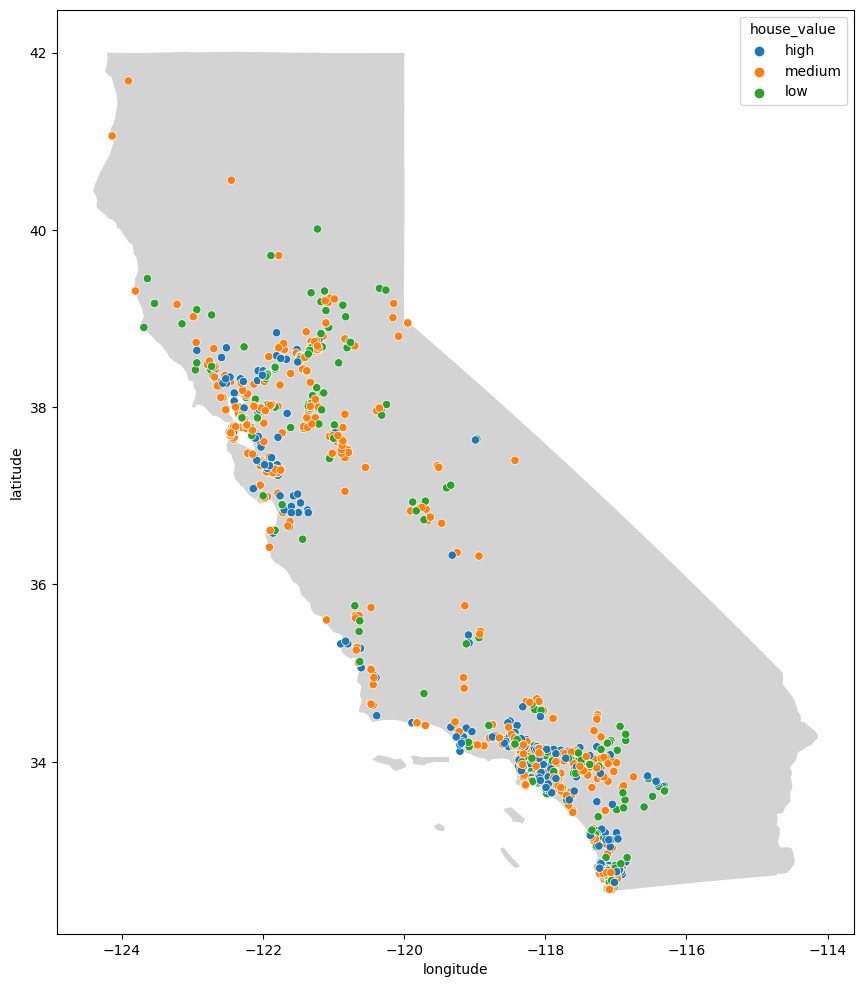

In [56]:
plot_eval_map(X_test_class, y_pred_knn, y_test_class["house_value"])

#### Classification - DecisionTree

Secondly, we want to train a Decision Tree Classifier with a max depth of 13. (Additional note: you can experiment with the number of neighbors to improve the model performance)

In [73]:
from sklearn.tree import DecisionTreeClassifier

#Initializing the dtc-model
class_dtc = DecisionTreeClassifier(max_depth=13)
#training the model on the training data
class_dtc.fit(X_train_class, y_train_class)
#generating the classifications on our test data
y_pred_dtc = class_dtc.predict(X_test_class)

#metrics of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_dtc))
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_dtc))

Confusion Matrix:
[[1579   30  409]
 [  58 1762  269]
 [ 327  289 1469]]

Classification Report:
              precision    recall  f1-score   support

        high       0.80      0.78      0.79      2018
         low       0.85      0.84      0.85      2089
      medium       0.68      0.70      0.69      2085

    accuracy                           0.78      6192
   macro avg       0.78      0.78      0.78      6192
weighted avg       0.78      0.78      0.78      6192



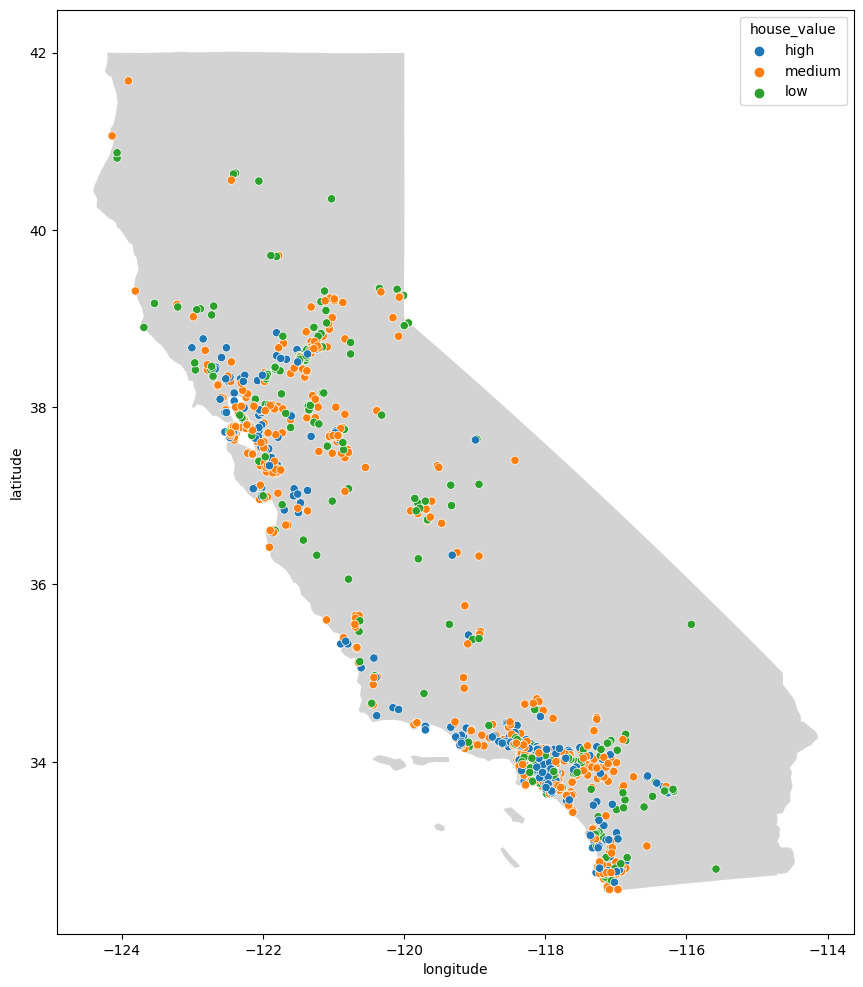

In [55]:
plot_eval_map(X_test_class, y_pred_dtc, y_test_class["house_value"])

Now that we have 2 classifiers that can predict whether a house in a certain position has ether a low, medium or high price, we want to develop a model that can predict a concrete value by using regression.

#### Regression - Lineare Regression

We start with a linear regression. Since only the geographical position is not sufficient for predicting an exact value, we adapt the feature list by adding the median income and the total rooms. Our output is now the median house value.

We use the RMSE and the R2-Score as metrics for our model.

In [177]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#features = ["longitude", "latitude"]
#features = ["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]
features = ["longitude",	"latitude", "median_income", "total_rooms"]
label = ["median_house_value"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df[label], test_size=0.30, random_state=42)

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Initializing the linear regression model
reg_lin = LinearRegression()
#training the model on the training data
reg_lin.fit(X_train_reg, y_train_reg)
#generating the classifications on our test data
y_pred_lin = reg_lin.predict(X_test_reg)

#metrics of the model
print("The RMSE is: " + str(round(np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)),2)))
print("The R2-Score is: " + str(r2_score(y_test_reg, y_pred_lin)))

The RMSE is: 74499.38
The R2-Score is: 0.581019645263047


#### Regression - Polynomial Regression

Next, we want to build a polynomial regression model. Therefore we have to transform our features into a higher dimensional room (in this case 3) and put these new features into a linear regression model.

In order to make this process more efficent we use a sklearn Pipeline. For more information follow the link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

reg_pol = Pipeline([
    ('poly', PolynomialFeatures(degree=3)), #generating polinomial features
    ('regressor', LinearRegression()),      #initializing a linear regression model
])

#training the model on the training data by using a pipeline
reg_pol.fit(X_train_reg, y_train_reg)
y_pred_pol = reg_pol.predict(X_test_reg)

#metrics of the model
print("The RMSE is: " + str(round(np.sqrt(mean_squared_error(y_test_reg, y_pred_pol)),2)))
print("The R2-Score is: " + str(r2_score(y_test_reg, y_pred_pol)))

The RMSE is: 72378.29
The R2-Score is: 0.604537806490858


#### Regression - Random Forest

Last we want to train a random forest regression. Like with the decision tree we have to set the max depth. In our case we chose 15:

In [174]:
from sklearn.ensemble import RandomForestRegressor

#Initializing the random forest regression model
reg_rfr = RandomForestRegressor(max_depth=15)
#training the model on the training data
reg_rfr.fit(X_train_reg, y_train_reg.values.ravel())
#generating the classifications on our test data
y_pred_rfr = reg_rfr.predict(X_test_reg)

#metrics of the model
print("The RMSE is: " + str(round(np.sqrt(mean_squared_error(y_test_reg, y_pred_rfr)),2)))
print("The R2-Score is: " + str(r2_score(y_test_reg, y_pred_rfr)))

The RMSE is: 49331.07
The R2-Score is: 0.8162914211683573


# 5. Evaluation

In [41]:
# TODO build pipeline for best models

#rmse -> wie viel weicht vorhergesgater Wert im Schnitt von dem tatsächlichen Wert ab -> hier Wert in Dollar
#r2 -> gibt Güte des Modells an -> 1 ist ein perfektes Modell

Extra ToDo:
- ROC Curve?
- Model vergleichen?

# 6. Deployment

In [42]:
import requests
import urllib.parse

def get_lat_long_by_address(address):
  url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
  response = requests.get(url).json()

  return {"longitude": response[0]["lon"], "latitude": response[0]["lat"]}

In [43]:
class_model = knn_model

def get_house_value_class(address):

  input = pd.DataFrame([get_lat_long_by_address(address)])
  output = class_model.predict(input)
  return output[0]


In [44]:
regr_model = linreg_model

def get_house_value_estimate(address, additional_info):

  input = additional_info
  input["longitude"] = get_lat_long_by_address(address)["longitude"]
  input["latitude"] = get_lat_long_by_address(address)["latitude"]
  input = pd.DataFrame([input]).loc[:,["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]]
  output = regr_model.predict(input)
  return output[0][0]

In [45]:
additional_info = {"housing_median_age": 20,	"total_rooms": 5000,	"total_bedrooms": 2000,	"population": 2000,	"households": 500,	"median_income": 5}

In [46]:
address = 'Belmont Heights, Long Beach, California'
# address = 'East Los Angeles, California, USA'
# address = 'San Pedro, Los Angeles, California'
#address = '4304 W Dakota Ave, Fresno, CA 93722'

In [47]:
get_house_value_class(address)

JSONDecodeError: ignored

In [ ]:
get_house_value_estimate(address, additional_info)